In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Exploration

In [113]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
df.shape

(1599, 12)

In [115]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Visualization

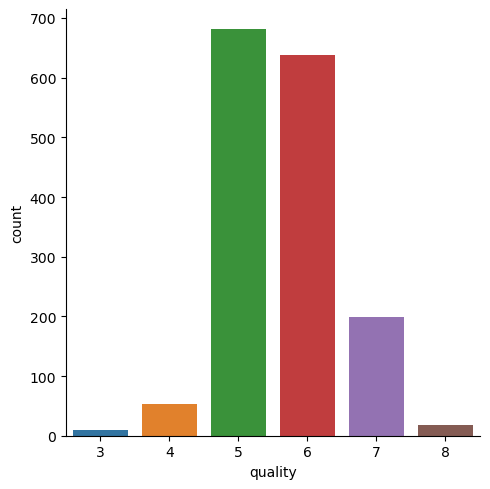

In [131]:
sns.catplot(x='quality',data=df,kind='count')
plt.show()

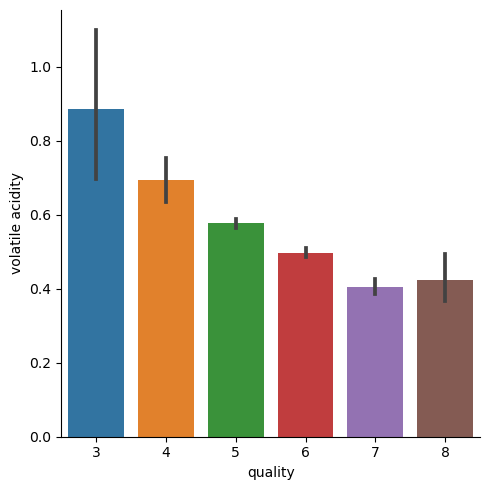

In [133]:
sns.catplot(x='quality',y='volatile acidity',data=df,kind='bar')
plt.show()

##### As the volatile acidity decreases the quality decreases

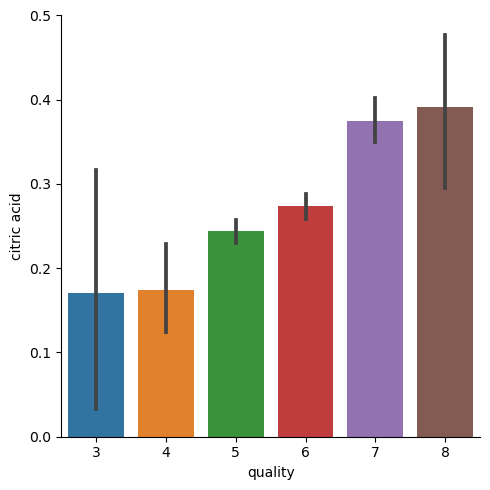

In [135]:
sns.catplot(x='quality',y='citric acid',data=df,kind='bar')
plt.show()

##### When the citric acid increases the quality incrreases too

<Axes: >

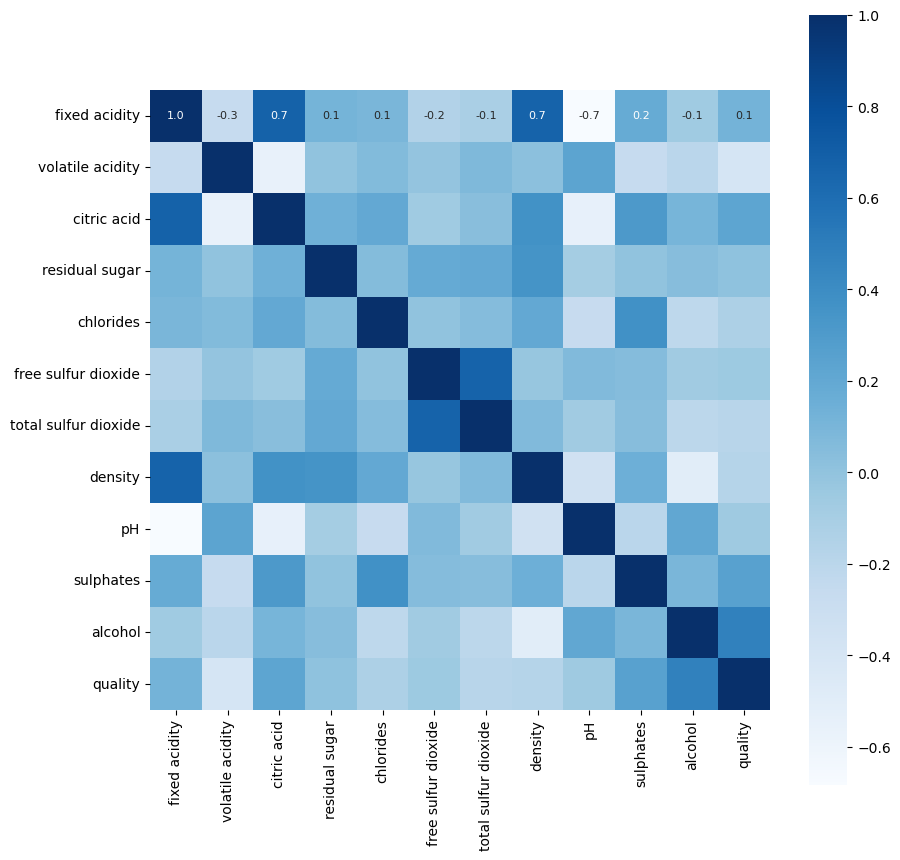

In [150]:
plt.figure(figsize=(10,10))
correlation=df.corr()
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

### Data Preprocessing

In [155]:
X = df.drop(columns=['quality'])
y= df['quality'].apply(lambda x: 1 if x >= 7  else 0)

### Model building

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Model Evaluation

In [159]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train accuracy_score: ", accuracy_score(y_train,y_pred_train))
print("Test accuracy_score: ", accuracy_score(y_test,y_pred))

Train accuracy_score:  1.0
Test accuracy_score:  0.90625


### Building a predictive system

In [172]:
input_data = (7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
result = model.predict(input_data)
print(result)
if result == 0:
    print("bad wine quality")
else:
    print("good wine quality")

[0]
bad wine quality


E:\programms\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
